In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [39]:
data = pd.read_csv('housing.csv')

In [40]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [41]:
data.dropna(inplace=True)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [43]:
x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2)

In [45]:
train_data = x_train.join(y_train)

In [46]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14657,-117.15,32.78,25.0,1577.0,266.0,611.0,284.0,5.2500,NEAR OCEAN,205100.0
10313,-117.80,33.85,23.0,3038.0,470.0,1568.0,438.0,5.6403,<1H OCEAN,233000.0
5727,-118.22,34.19,36.0,2443.0,492.0,1115.0,493.0,3.9777,<1H OCEAN,409800.0
16629,-120.82,35.32,12.0,3522.0,683.0,1780.0,662.0,3.3958,NEAR OCEAN,215800.0
4677,-118.34,34.08,52.0,1421.0,163.0,495.0,167.0,10.5860,<1H OCEAN,500001.0
...,...,...,...,...,...,...,...,...,...,...
5607,-118.30,33.79,21.0,1068.0,283.0,1180.0,274.0,2.5000,<1H OCEAN,157500.0
20226,-119.30,34.29,26.0,3665.0,932.0,2775.0,870.0,1.9286,NEAR OCEAN,160500.0
13936,-117.28,34.24,16.0,3474.0,633.0,853.0,315.0,5.2185,INLAND,128600.0
6984,-118.02,33.96,36.0,2071.0,398.0,988.0,404.0,4.6226,<1H OCEAN,219700.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

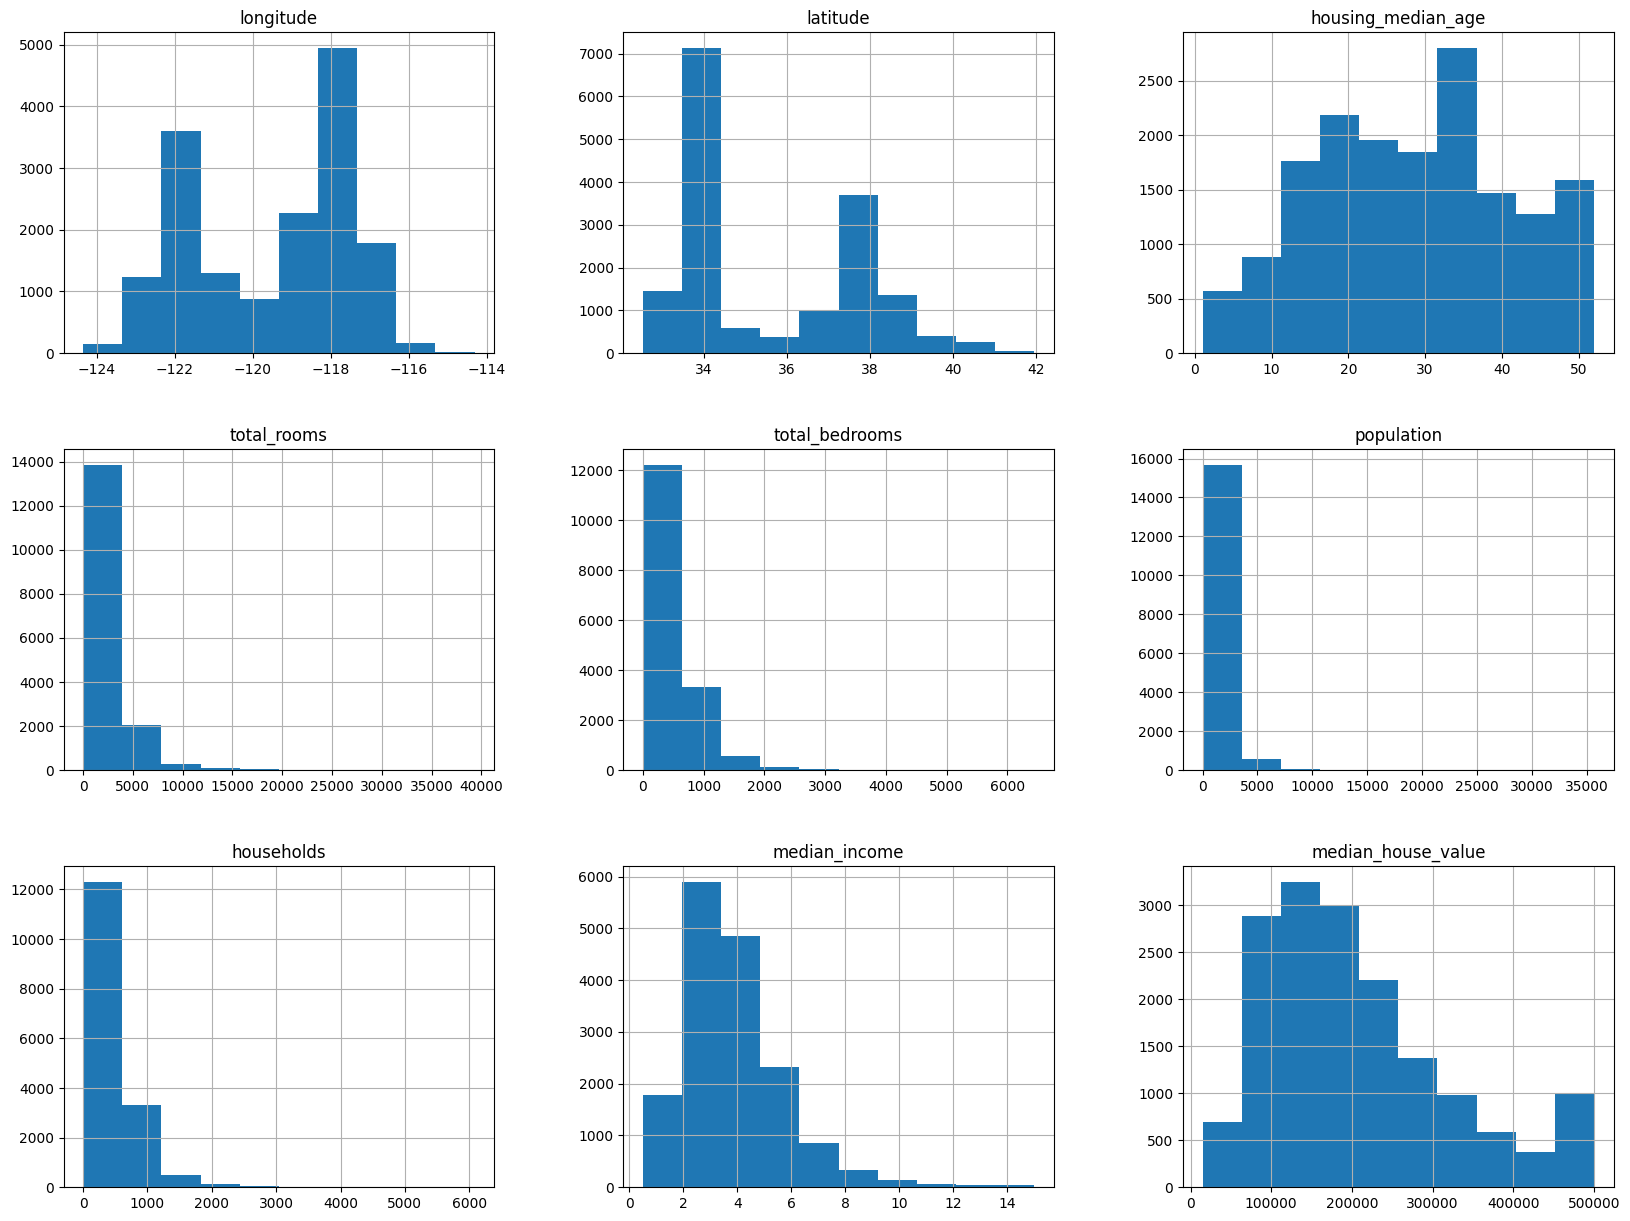

In [47]:
train_data.hist(figsize=(20,15))

In [49]:
train_data['total_rooms'] = np.log1p(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log1p(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log1p(train_data['population'] + 1)
train_data['households'] = np.log1p(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

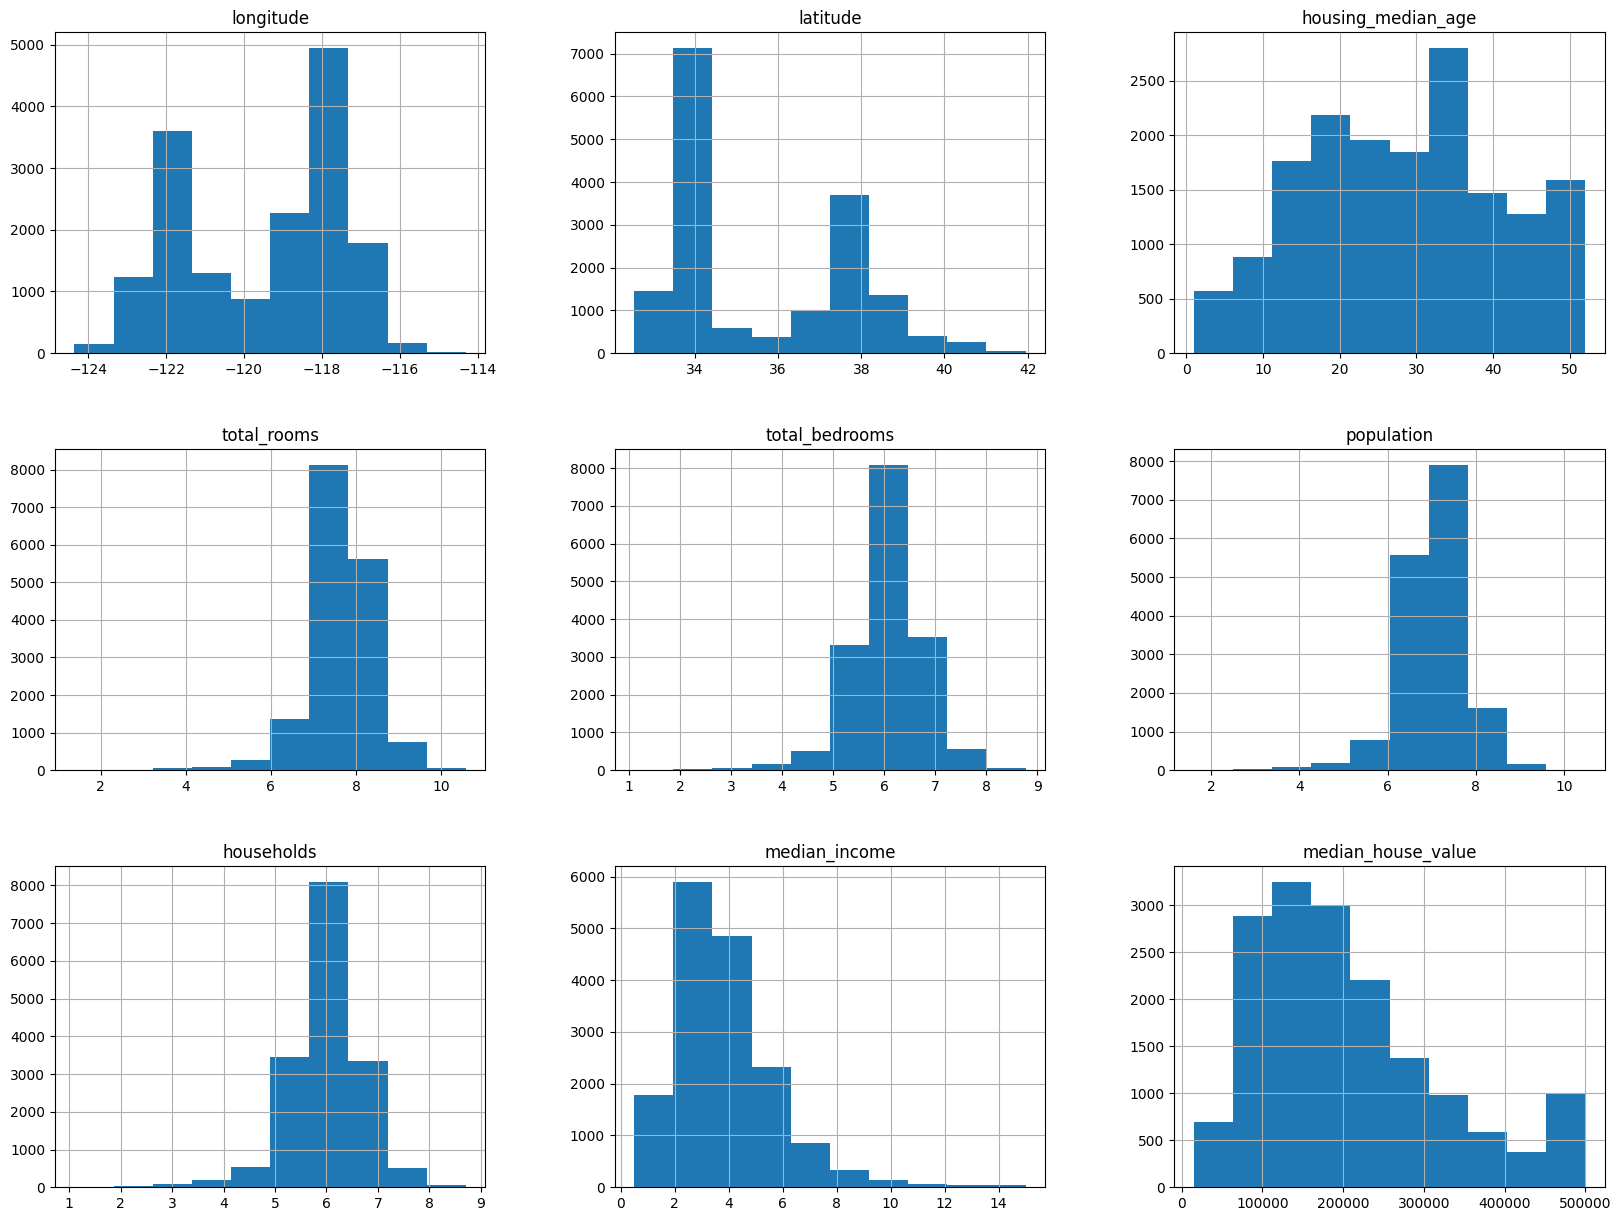

In [50]:
train_data.hist(figsize=(20,15))

In [51]:
train_data = pd.get_dummies(train_data, columns=['ocean_proximity'])

In [53]:
bool_cols = train_data.select_dtypes('bool').columns
train_data[bool_cols] = train_data[bool_cols].astype(int)

In [54]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
14657,-117.15,32.78,25.0,7.364547,5.590987,6.418365,5.655992,5.2500,205100.0,0,0,0,0,1
10313,-117.80,33.85,23.0,8.019613,6.156979,7.358831,6.086775,5.6403,233000.0,1,0,0,0,0
5727,-118.22,34.19,36.0,7.801800,6.202536,7.018402,6.204558,3.9777,409800.0,1,0,0,0,0
16629,-120.82,35.32,12.0,8.167352,6.529419,7.485492,6.498282,3.3958,215800.0,0,0,0,0,1
4677,-118.34,34.08,52.0,7.260523,5.105945,6.208590,5.129899,10.5860,500001.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5607,-118.30,33.79,21.0,6.975414,5.652489,7.074963,5.620401,2.5000,157500.0,1,0,0,0,0
20226,-119.30,34.29,26.0,8.207129,6.839476,7.929126,6.770789,1.9286,160500.0,0,0,0,0,1
13936,-117.28,34.24,16.0,8.153637,6.453625,6.751101,5.758902,5.2185,128600.0,0,1,0,0,0
6984,-118.02,33.96,36.0,7.636752,5.991465,6.897705,6.006353,4.6226,219700.0,1,0,0,0,0


<Axes: >

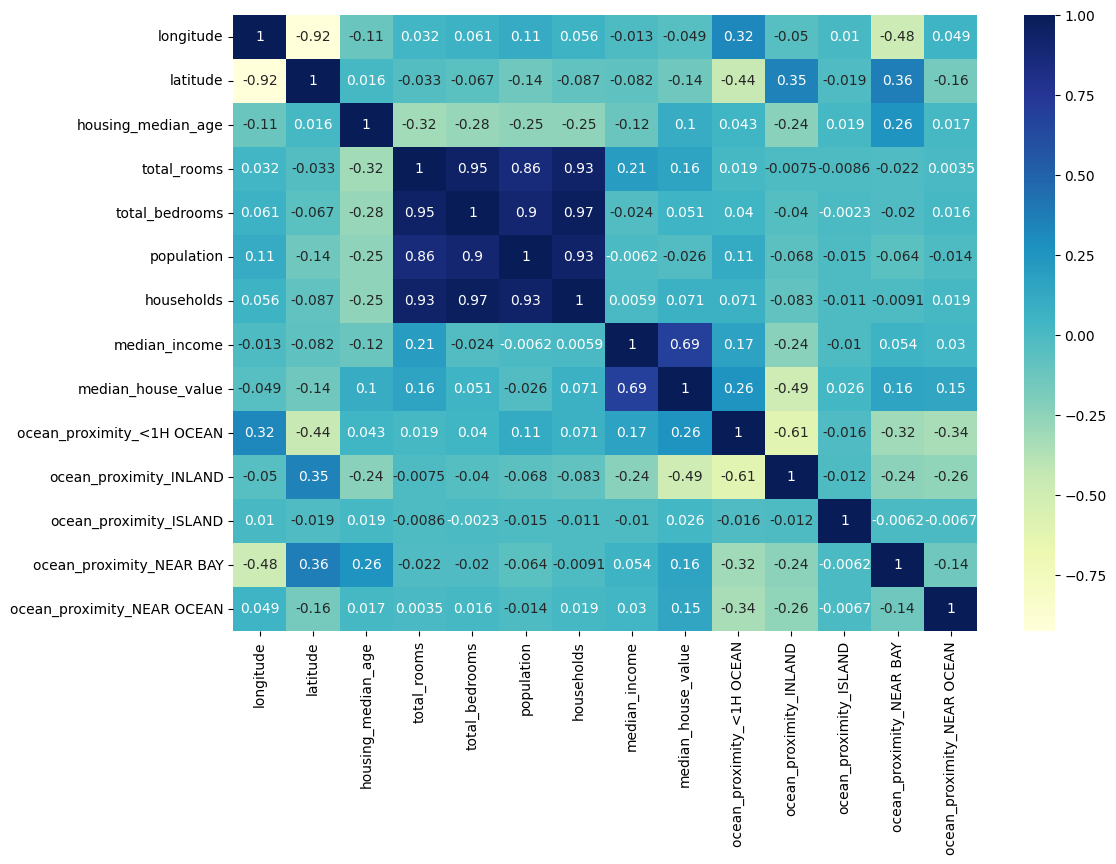

In [57]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

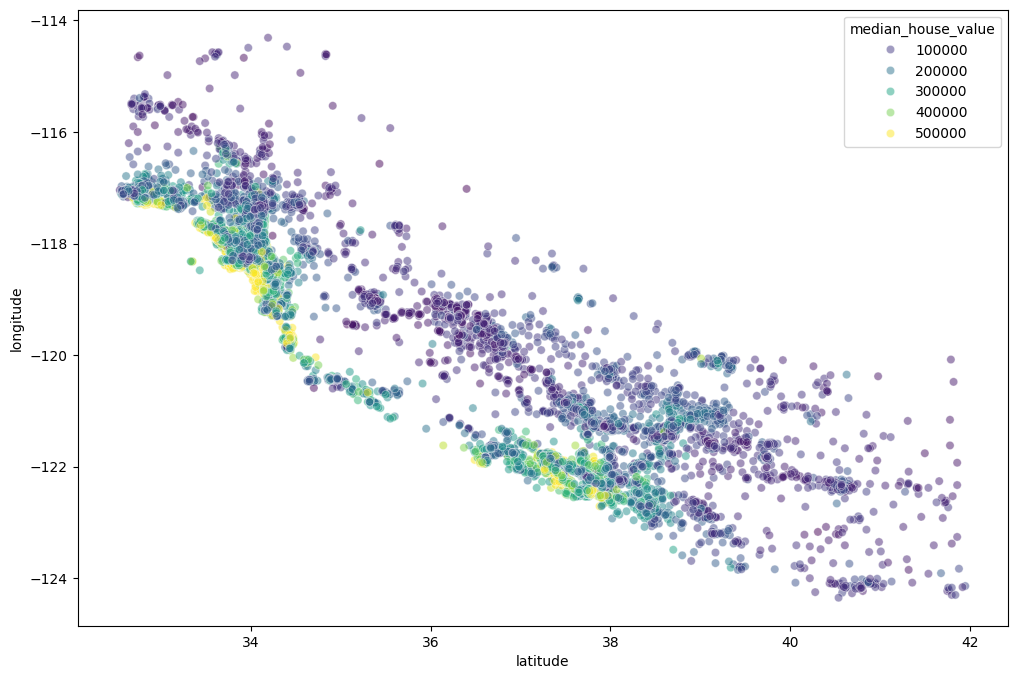

In [58]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=train_data, x='latitude', y='longitude', hue='median_house_value', palette='viridis', alpha=0.5)

In [59]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

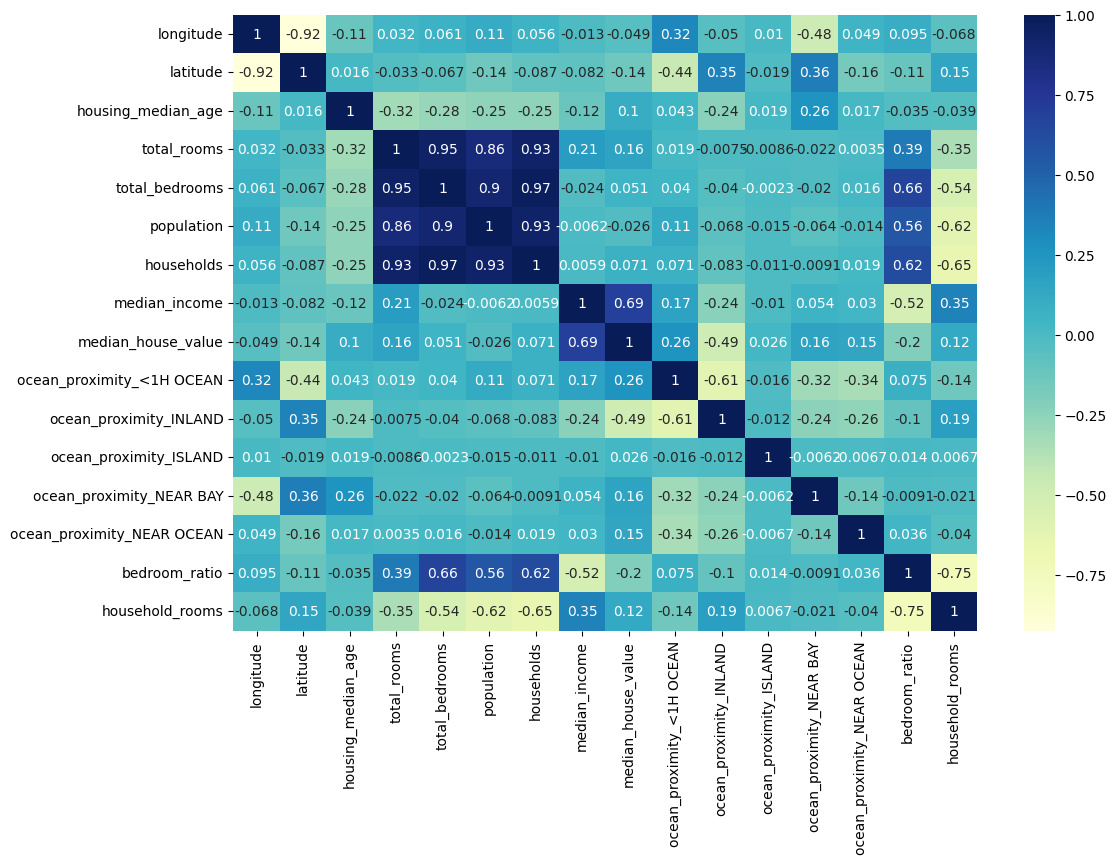

In [60]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')

In [64]:
x_train = train_data.drop(['median_house_value'], axis=1)
y_train = train_data['median_house_value']
reg = LinearRegression()
reg.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log1p(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log1p(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log1p(test_data['population'] + 1)
test_data['households'] = np.log1p(test_data['households'] + 1)

test_data = pd.get_dummies(test_data, columns=['ocean_proximity'])
bol_cols = test_data.select_dtypes('bool').columns
test_data[bol_cols] = test_data[bol_cols].astype(int)
for col in train_data.columns:
    if col not in test_data.columns:
        test_data[col] = 0 

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [71]:
x_test = test_data.drop(['median_house_value'], axis=1)
y_test = test_data['median_house_value']

In [70]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,ocean_proximity_ISLAND,bedroom_ratio,household_rooms
177,-122.24,37.80,47.0,7.624619,6.380123,7.102499,6.320768,2.6292,182700.0,0,0,1,0,0,0.836779,1.206280
13420,-117.50,34.04,4.0,8.140316,6.478510,7.677864,6.452049,5.0175,143400.0,0,1,0,0,0,0.795855,1.261664
15273,-117.28,33.06,8.0,8.336630,6.931472,7.858254,6.849066,4.0118,245800.0,0,0,0,1,0,0.831448,1.217192
1685,-122.28,37.99,28.0,8.243546,6.436150,7.412160,6.350886,4.3750,193300.0,0,0,1,0,0,0.780750,1.298015
9456,-123.71,39.88,42.0,7.326466,5.953243,6.489205,5.720312,1.4952,69800.0,0,0,0,1,0,0.812567,1.280781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5106,-118.31,33.95,44.0,7.820841,6.068426,7.175490,6.023448,4.8295,149600.0,1,0,0,0,0,0.775930,1.298399
13001,-121.27,38.67,16.0,8.066835,6.788972,7.347300,6.689599,2.5199,149000.0,0,1,0,0,0,0.841590,1.205877
2073,-119.83,36.76,15.0,8.099554,6.651572,7.461640,6.455199,1.9760,67300.0,0,1,0,0,0,0.821227,1.254734
7733,-118.14,33.93,32.0,7.633854,6.086775,6.981935,6.095825,4.4279,226400.0,1,0,0,0,0,0.797340,1.252309


In [73]:
x_test = x_test[x_train.columns]
reg.score(x_test,y_test)

0.6653900169274425